#### Importação e Exploração dos Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('C:\\Users\\byoli\\OneDrive\\Área de Trabalho\\InsightTech Marketing Digital\\Análise Campanhas\\Data\\dados_campanhas.xlsx')
df.head()

,campanha_id,plataforma,orcamento,impressoes,cliques,conversoes,receita,data_inicio,data_fim
0,campanha_001,Google Ads,4058.13,95564,10748,1824,72309.82,2024-01-07,2024-03-01
1,campanha_002,Instagram Ads,1981.95,15227,1998,340,49141.49,2024-03-03,2024-03-24
2,campanha_003,Facebook Ads,695.55,97291,12311,1138,50694.19,2024-01-27,2024-03-17
3,campanha_004,TikTok Ads,2242.34,37381,3120,425,27766.75,2024-01-23,2024-03-07
4,campanha_005,LinkedIn Ads,6312.60,22554,1148,141,13628.11,2024-01-09,2024-01-17


In [7]:
# Tipos dos dados
print(df.dtypes)

campanha_id            object
plataforma             object
orcamento             float64
impressoes              int64
cliques                 int64
conversoes              int64
receita               float64
data_inicio    datetime64[ns]
data_fim       datetime64[ns]
dtype: object


In [6]:
# Valores nulos
df.isnull().sum()

campanha_id    0
plataforma     0
orcamento      0
impressoes     0
cliques        0
conversoes     0
receita        0
data_inicio    0
data_fim       0
dtype: int64

In [8]:
# Estatísticas
df.describe()

,orcamento,impressoes,cliques,conversoes,receita,data_inicio,data_fim
count,100.000000,100.000000,100.000000,100.000000,100.000000,100,100
mean,5294.751700,57270.380000,4629.960000,692.830000,67875.399500,2024-03-23 03:36:00,2024-04-24 23:16:48
min,587.370000,11021.000000,231.000000,39.000000,1176.290000,2024-01-01 00:00:00,2024-01-16 00:00:00
25%,3156.550000,35354.500000,1534.000000,202.000000,15431.505000,2024-02-05 18:00:00,2024-03-11 18:00:00
50%,5272.095000,60073.500000,3677.500000,523.000000,34188.070000,2024-03-18 00:00:00,2024-04-21 00:00:00
75%,7847.972500,79500.750000,7175.750000,961.500000,88075.780000,2024-05-09 06:00:00,2024-06-07 12:00:00
max,9933.170000,99104.000000,13665.000000,2584.000000,367443.670000,2024-06-29 00:00:00,2024-08-17 00:00:00
std,2825.895371,26991.450435,3599.439965,616.096199,81660.195142,NaN,NaN


In [9]:
# Criação de colunas úteis

df['taxa_conversao'] = df['conversoes'] / df['cliques']
df['roi'] = df['receita'] / df['orcamento']

#### Respostas Estratégicas a partir dos Dados

In [11]:
# Qual plataforma recebeu mais investimento total?

df.groupby('plataforma')['orcamento'].sum().sort_values(ascending=True)

plataforma
TikTok Ads        75613.72
Facebook Ads      90875.44
Instagram Ads     92157.71
LinkedIn Ads     131590.55
Google Ads       139237.75
Name: orcamento, dtype: float64

In [63]:
# Qual teve maior taxa média de conversão?

df.groupby('plataforma')['taxa_conversao'].mean().sort_values(ascending=False)

plataforma
TikTok Ads       0.179307
Google Ads       0.159240
Facebook Ads     0.147802
Instagram Ads    0.147783
LinkedIn Ads     0.142185
Name: taxa_conversao, dtype: float64

In [ ]:
# Qual campanha teve o maior ROI?

df.loc[df['roi'].idxmax()]

campanha_id              campanha_093
plataforma               Facebook Ads
orcamento                      1616.5
impressoes                      68428
cliques                          7831
conversoes                       1305
receita                     251620.68
data_inicio       2024-03-12 00:00:00
data_fim          2024-04-17 00:00:00
taxa_conversao               0.166645
roi                        155.657705
Name: 92, dtype: object

In [42]:
# Em que mês houve maior receita total?

df['mes'] = df['data_inicio'].dt.to_period('M')
df.groupby('mes')['receita'].sum().sort_values(ascending=False)

mes
2024-03    1715563.53
2024-01    1514748.74
2024-05    1189083.19
2024-02    1053353.67
2024-04     659834.55
2024-06     654956.27
Freq: M, Name: receita, dtype: float64

##### Exportação

In [62]:
df.to_excel('C:\\Users\\byoli\\OneDrive\\Área de Trabalho\\InsightTech Marketing Digital\\Análise Campanhas\\Data\\dados_limpos.xlsx')

### Análises e Visualizações

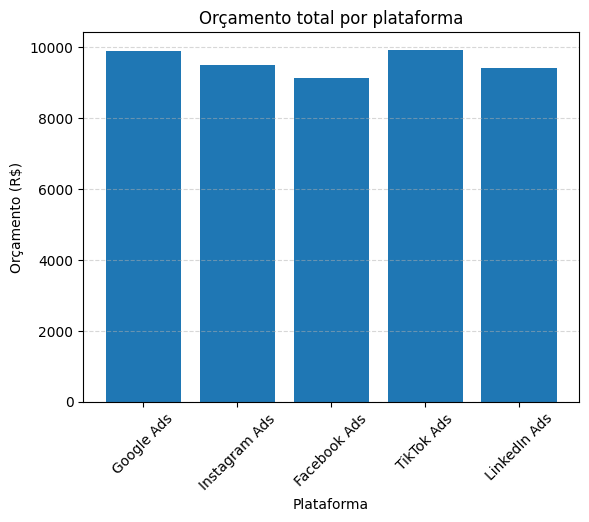

In [67]:
# Gráfico de barras com orçamento total por plataforma

plt.bar(df['plataforma'], df['orcamento'])
plt.title('Orçamento total por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Orçamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

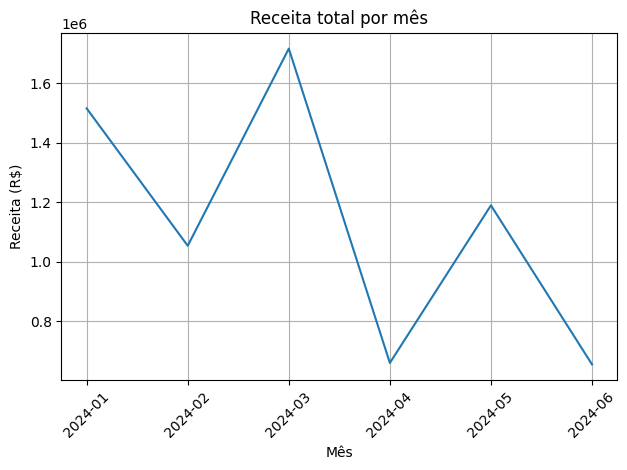

In [68]:
# Gráfico de linha com receita total por mês

receita_total_mes = df.groupby('mes')['receita'].sum().sort_index()
plt.plot(receita_total_mes.index.astype(str), receita_total_mes.values)
plt.title('Receita total por mês')
plt.xlabel('Mês')
plt.ylabel('Receita (R$)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

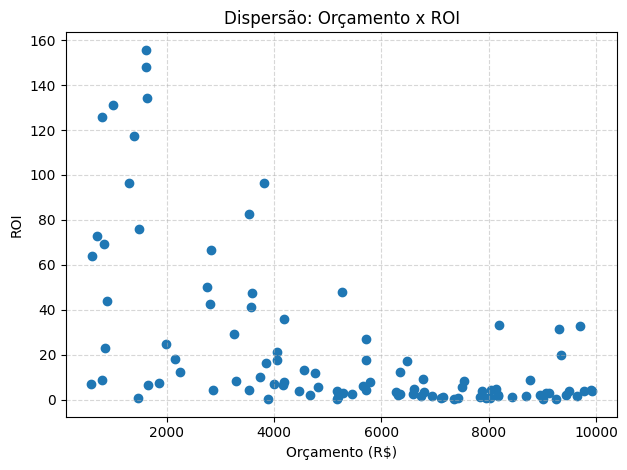

In [69]:
# Gráfico de dispersão entre orçamento e ROI

plt.scatter(df['orcamento'], df['roi'])
plt.title('Dispersão: Orçamento x ROI')
plt.xlabel('Orçamento (R$)')
plt.ylabel('ROI')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



#### Principais Insights

- A plataforma **TikTok** recebeu o maior orçamento total.
- O **TikTok** apresentou também a melhor taxa média de conversão, indicando alta eficiência.
- A campanha com maior ROI foi realizada no **Facebook**.
- O mês com maior receita acumulada foi **março**.

#### Conclusão
Este projeto simula a entrega de uma análise de performance de marketing para uma empresa fictícia. Ele demonstra competências em manipulação de dados, visualização e pensamento analítico para gerar insights úteis ao negócio.
